## What are the most demanded skills for top 3 post popular data jobs?

### Methodology
 1. Clean-up skills column
 2. Calculate skill count based on job_title_shot
 3. Calculate skill percentage
 4. Plot final findings

In [1]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datasets import load_dataset
import ast
import seaborn as sns

# Loading data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data cleanup
df.job_posted_date = pd.to_datetime(df.job_posted_date)
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [44]:
# Extract only data for the US and Vietnam
country_list=['United States','Vietnam']
df_country = df[df['job_country'].isin(country_list)]
df_country.job_country.value_counts()

job_country
United States    206292
Vietnam            2414
Name: count, dtype: int64

In [6]:
df_exploded = df_country.explode('job_skills')
skill_count_by_job = df_exploded.groupby(['job_title_short','job_skills']).size()
df_skill_count_by_job = skill_count_by_job.reset_index(name='skill_counts')
df_skill_count_by_job = df_skill_count_by_job.sort_values(by = 'skill_counts', ascending=False)
df_skill_count_by_job

,job_title_short,job_skills,skill_counts
894,Data Scientist,python,42609
480,Data Analyst,sql,34609
929,Data Scientist,sql,30187
359,Data Analyst,excel,27618
898,Data Scientist,r,26113
...,...,...,...
76,Business Analyst,mongo,1
1737,Software Engineer,dplyr,1
1738,Software Engineer,drupal,1
340,Data Analyst,couchdb,1


In [20]:
# Data in the US:
df_US = df_exploded[df_exploded['job_country']=='United States']
US_skill_count = df_US.groupby(['job_title_short','job_skills']).size()
US_df_skill_count = US_skill_count.reset_index(name='skill_counts')
US_df_skill_count = US_df_skill_count.sort_values(by = 'skill_counts', ascending=False)
US_df_skill_count

,job_title_short,job_skills,skill_counts
886,Data Scientist,python,42379
472,Data Analyst,sql,34452
921,Data Scientist,sql,30034
351,Data Analyst,excel,27519
890,Data Scientist,r,26022
...,...,...,...
1313,Senior Data Engineer,asp.net core,1
228,Cloud Engineer,ms access,1
1020,Machine Learning Engineer,graphql,1
1582,Senior Data Scientist,mariadb,1


In [16]:
# Data in VN:
df_VN = df_exploded[df_exploded['job_country']=='Vietnam']
VN_skill_count = df_VN.groupby(['job_title_short','job_skills']).size()
VN_df_skill_count = VN_skill_count.reset_index(name='skill_counts')
VN_df_skill_count = VN_df_skill_count.sort_values(by = 'skill_counts', ascending=False)
VN_df_skill_count

,job_title_short,job_skills,skill_counts
319,Data Engineer,sql,477
293,Data Engineer,python,468
315,Data Engineer,spark,282
257,Data Engineer,java,231
406,Data Scientist,python,230
...,...,...,...
301,Data Engineer,rshiny,1
678,Senior Data Scientist,gdpr,1
298,Data Engineer,redhat,1
282,Data Engineer,opencv,1


In [49]:
# Calculating the percentage of a skill appearing in a job posting: % = total counts of a skills / total counts of job posting for each job title
df_job_count_US = df_country[df_country['job_country']=='United States']['job_title_short'].value_counts().to_frame()
df_job_count_VN = df_country[df_country['job_country']=='Vietnam']['job_title_short'].value_counts().to_frame()
df_job_count_VN

,count
job_title_short,
Data Engineer,768
Data Scientist,375
Data Analyst,334
Software Engineer,279
Senior Data Engineer,220
Machine Learning Engineer,115
Business Analyst,91
Senior Data Scientist,91
Senior Data Analyst,71


In [51]:
df_skill_percent_US = pd.merge(US_df_skill_count, df_job_count_US, how='left', on='job_title_short')
df_skill_percent_US['skill_percent']= 100*(df_skill_percent_US['skill_counts']/df_skill_percent_US['count'])

In [53]:
df_skill_percent_VN = pd.merge(VN_df_skill_count, df_job_count_VN, how='left', on='job_title_short')
df_skill_percent_VN['skill_percent']= 100*(df_skill_percent_VN['skill_counts']/df_skill_percent_VN['count'])
df_skill_percent_VN

,job_title_short,job_skills,skill_counts,count,skill_percent
0,Data Engineer,sql,477,768,62.109375
1,Data Engineer,python,468,768,60.937500
2,Data Engineer,spark,282,768,36.718750
3,Data Engineer,java,231,768,30.078125
4,Data Scientist,python,230,375,61.333333
...,...,...,...,...,...
834,Data Engineer,rshiny,1,768,0.130208
835,Senior Data Scientist,gdpr,1,91,1.098901
836,Data Engineer,redhat,1,768,0.130208
837,Data Engineer,opencv,1,768,0.130208


In [22]:
# Top 3 job titles based on highest skill counts
# in the US:
job_titles_US = US_df_skill_count ['job_title_short'].unique().tolist()
job_titles_US = sorted(job_titles_US[0:3])

# in VN:
job_titles_VN = VN_df_skill_count ['job_title_short'].unique().tolist()
job_titles_VN = sorted(job_titles_VN[0:3])
job_titles_VN

['Data Analyst', 'Data Engineer', 'Data Scientist']

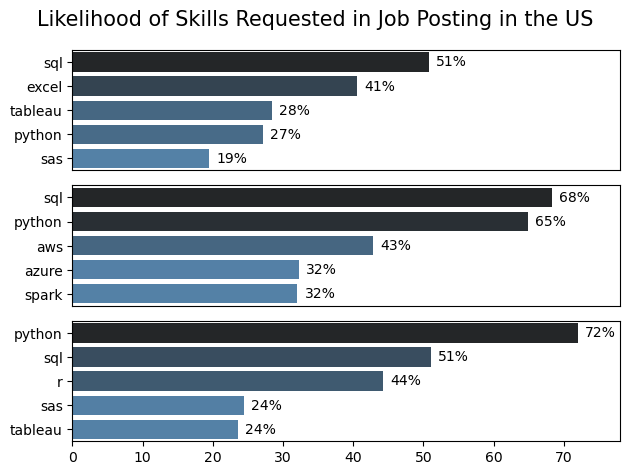

In [77]:
fig, ax = plt.subplots(len(job_titles_US),1)

for i, job_title in enumerate(job_titles_US):
    df_final_US = df_skill_percent_US[df_skill_percent_US['job_title_short'] == job_title].head(5)
#   Creating a plot:
    #df_final_US.plot(kind = 'barh', x = 'job_skills', y = 'skill_percent', ax = ax[i], title = job_title)
    sns.barplot(df_final_US, x='skill_percent', y='job_skills', ax=ax[i], hue='skill_percent', palette='dark:steelblue_r')
# Formatting:
    ax[i].invert_yaxis()
    ax[i].invert_yaxis()      
    ax[i].legend ().set_visible(False)  
    ax[i].set_ylabel('')
    ax[i].set_xlabel('')
    ax[i].set_xlim(0,78)
    #R Remove the tick in x axis, only keep the tick in the bottom plot
    if i != len(job_titles)-1:
        ax[i].set_xticks([])

    # Showing the data label for each bar
    for index, value in enumerate(df_final_US['skill_percent']):
        ax[i].text(value+1,index,f'{value:,.0f}%', va='center')

fig.suptitle('Likelihood of Skills Requested in Job Posting in the US', fontsize=15)
fig.tight_layout()

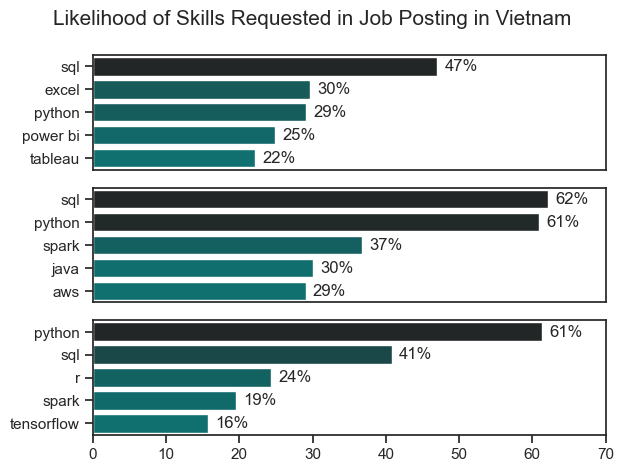

In [80]:
fig, ax = plt.subplots(len(job_titles_VN),1)

for i, job_title in enumerate(job_titles_VN):
    df_final_VN = df_skill_percent_VN[df_skill_percent_VN['job_title_short'] == job_title].head(5)
#   Creating a plot:
    #df_final_VN.plot(kind = 'barh', x = 'job_skills', y = 'skill_percent', ax = ax[i], title = job_title)
    sns.barplot(df_final_VN, x='skill_percent', y='job_skills', ax=ax[i], hue='skill_percent', palette='dark:teal_r')
# Formatting:
    ax[i].invert_yaxis()
    ax[i].invert_yaxis()      
    ax[i].legend ().set_visible(False)  
    ax[i].set_ylabel('')
    ax[i].set_xlabel('')
    ax[i].set_xlim(0,70)
    #R Remove the tick in x axis, only keep the tick in the bottom plot
    if i != len(job_titles)-1:
        ax[i].set_xticks([])

    # Showing the data label for each bar
    for index, value in enumerate(df_final_VN['skill_percent']):
        ax[i].text(value+1,index,f'{value:,.0f}%', va='center')

fig.suptitle('Likelihood of Skills Requested in Job Posting in Vietnam', fontsize=15)
fig.tight_layout()